Analysis of my band's spotify data

1. Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

2. Connect to Spotify API

In [4]:
clientID = "YOUR_CLIENT_ID"
clientSecret = "YOUR_CLIENT_SECRET"
CCM = SpotifyClientCredentials(client_id = clientID, client_secret = clientSecret)

spotify = spotipy.Spotify(client_credentials_manager = CCM)

3. Get the uris for albums

In [5]:
band_uri = "spotify:artist:1SN71xW3yOVbPgsGFBMXTZ"
albums = spotify.artist_albums(artist_id = band_uri)
album_uri = {"Uri":[], "Title":[]}

for album in albums["items"]:
    album_uri["Uri"].append(album["uri"])
    album_uri["Title"].append(album["name"])

4. Get the track IDs of the albums

In [6]:
tracksDF = pd.DataFrame(columns=["Band_Name", "Album_Name", "Track_Name", "Track_Uri"])

for albums in album_uri["Uri"]:
    for tracks in spotify.album_tracks(album_id = albums)["items"]:
        if tracks["artists"][0]["name"] == "Csaknekedkislány":
            band_name = tracks["artists"][0]["name"]
            track_name = tracks["name"]
            track_uri = tracks["uri"]
            for i in range(len(album_uri["Uri"])):
                if album_uri["Uri"][i] == albums:
                    album_name = album_uri["Title"][i]
            temp_tracksDF = pd.DataFrame([[band_name, album_name, track_name, track_uri]], columns=["Band_Name", "Album_Name", "Track_Name", "Track_Uri"])
            tracksDF = pd.concat([tracksDF, temp_tracksDF], ignore_index=True)

5. Create Dataframe with spotify's data

In [7]:
detailsDF = pd.DataFrame(columns=["detailsUri", "Danceability", "Energy", "Loudness", "Speeichiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms"])

for details in tracksDF["Track_Uri"]:
    detailsUri = spotify.audio_features(tracks = details)[0]["uri"]
    danceability = spotify.audio_features(tracks = details)[0]["danceability"]
    energy = spotify.audio_features(tracks = details)[0]["energy"]
    loudness = spotify.audio_features(tracks = details)[0]["loudness"]
    speeichiness = spotify.audio_features(tracks = details)[0]["speechiness"]
    acousticness = spotify.audio_features(tracks = details)[0]["acousticness"]
    intrumentalness = spotify.audio_features(tracks = details)[0]["instrumentalness"]
    liveness = spotify.audio_features(tracks = details)[0]["liveness"]
    valence = spotify.audio_features(tracks = details)[0]["valence"]
    tempo = spotify.audio_features(tracks = details)[0]["tempo"]
    duration_ms = spotify.audio_features(tracks = details)[0]["duration_ms"]
    temp_detailsDF = pd.DataFrame([[detailsUri, danceability, energy, loudness, speeichiness, acousticness, intrumentalness, liveness, valence, tempo, duration_ms]], 
        columns=["detailsUri", "Danceability", "Energy", "Loudness", "Speeichiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms"])
    detailsDF = pd.concat([detailsDF, temp_detailsDF], ignore_index=True)

tracksDF = tracksDF.merge(right=detailsDF, how='inner', left_on="Track_Uri", right_on="detailsUri").drop(columns=["Track_Uri", "detailsUri"])
tracksDF.head()

6. Data Visualization

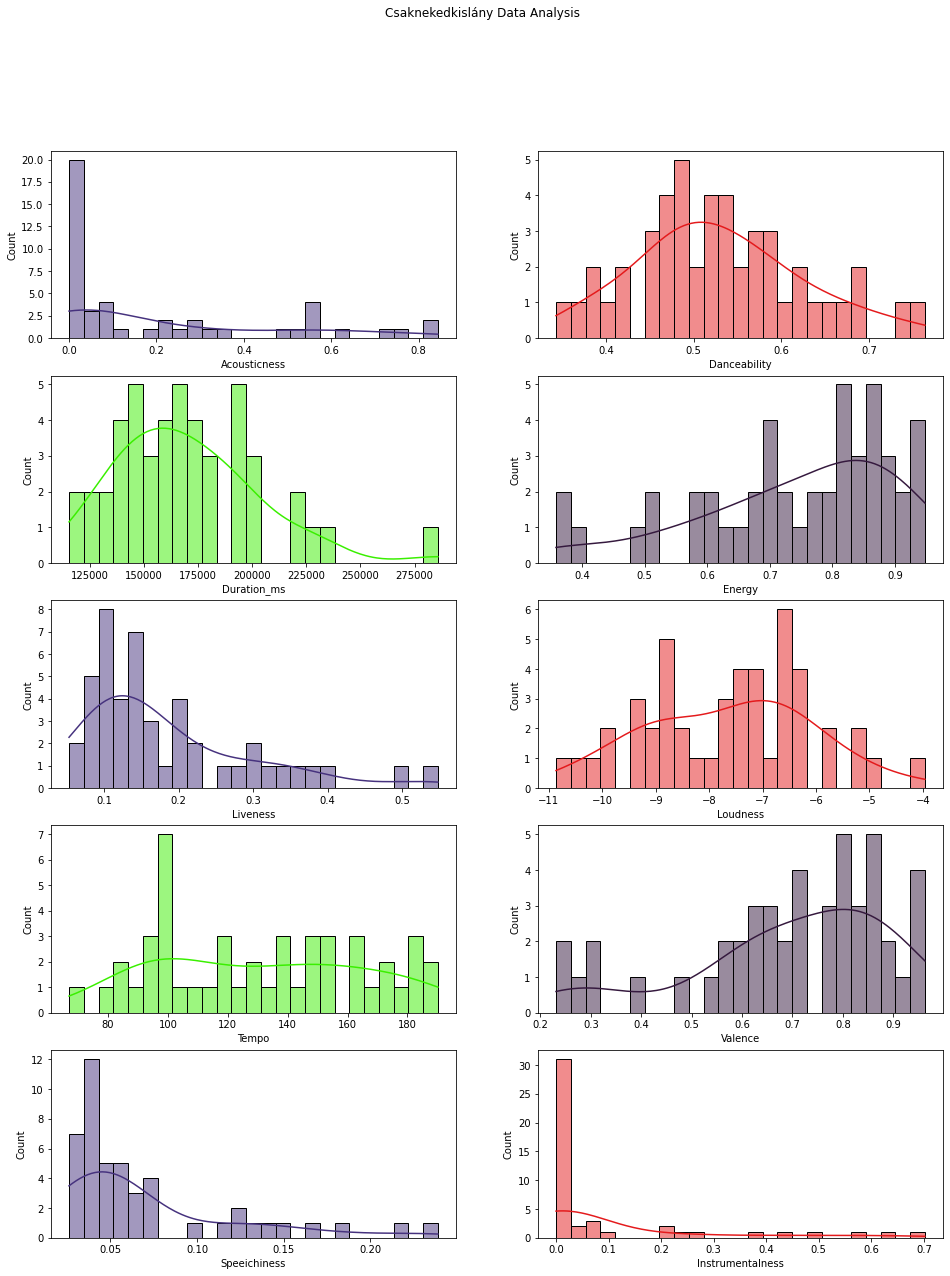

In [12]:
continuous_cols = ['Acousticness', 'Danceability', 'Duration_ms', 'Energy', 
    'Liveness', 'Loudness',  'Tempo',  'Valence', 'Speeichiness', 'Instrumentalness']

fig, axes = plt.subplots(5,2,figsize=(16,20))
palettes = ['viridis','Set1', 'prism', 'rocket']
axes = axes.flatten()
ax_no = 0
for col in continuous_cols:
    sns.set_palette(palettes[ax_no % 4])
    sns.histplot(data = tracksDF, x = col, bins=25, kde=True, ax = axes[ax_no])
    ax_no += 1
fig.suptitle("Csaknekedkislány Data Analysis")
plt.show()

7. Correlations

Text(0.5, 1.0, 'Negative Correlations')

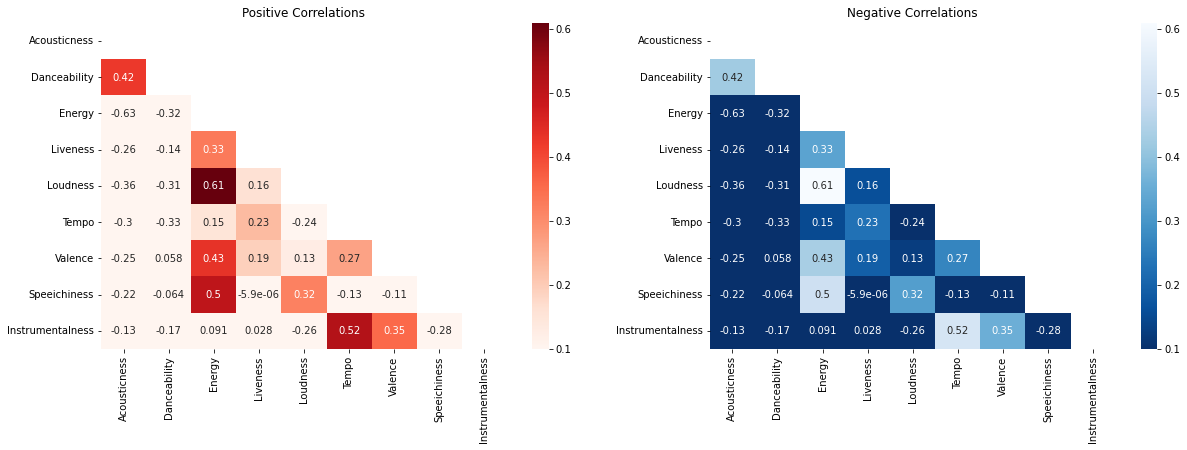

In [13]:
fig, axes = plt.subplots(1,2,figsize=(20,6))
corr = tracksDF[continuous_cols].corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(data=corr, annot=True, cmap="Reds", ax=axes[0], mask=mask, vmin=0.1)
axes[0].set_title("Positive Correlations")
sns.heatmap(data=corr, annot=True, cmap="Blues_r", ax=axes[1], mask=mask, vmin=0.1)
axes[1].set_title("Negative Correlations")